In [40]:
#Import libraries

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load the data
df = pd.read_csv('data.csv') 

## Examining the Dataset

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()
## 32 columns including the ID column, most listed as float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          566 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      567 non-null    float64
 10  symmetry_mean            567 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,568.000000,569.000000,569.000000,568.000000,566.000000,568.000000,567.000000,567.000000,567.000000,...,565.000000,566.000000,567.000000,567.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.130245,19.289649,105.047821,1636.702817,0.096248,0.104354,61.817244,0.048854,0.710289,...,16.276140,25.680954,107.268483,880.806349,0.132369,0.254265,0.271431,0.114606,0.290076,0.083946
std,1.250206e+08,3.526450,4.301036,312.218444,23262.664109,0.013971,0.052858,1469.858104,0.038787,12.596692,...,4.848664,6.156176,33.661357,570.349014,0.022832,0.157336,0.208023,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.697500,16.170000,75.210000,420.300000,0.086130,0.064815,0.029570,0.020310,0.162000,...,13.010000,21.085000,84.095000,514.650000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,9.060240e+05,13.375000,18.840000,86.340000,551.400000,0.095825,0.092525,0.061550,0.033500,0.179300,...,14.960000,25.405000,97.650000,684.600000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040
75%,8.813129e+06,15.797500,21.800000,104.300000,794.350000,0.105250,0.130425,0.132000,0.073820,0.195800,...,18.810000,29.832500,125.650000,1086.000000,0.146000,0.339100,0.381400,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,7517.000000,555000.100000,0.163400,0.345400,35000.000000,0.201200,300.130000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Preparing Data:

In [3]:
df.isnull().sum()
##few missing values to clean

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             0
area_mean                  1
smoothness_mean            3
compactness_mean           1
concavity_mean             2
concave points_mean        2
symmetry_mean              2
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               4
area_se                    4
smoothness_se              2
compactness_se             2
concavity_se               2
concave points_se          4
symmetry_se                3
fractal_dimension_se       3
radius_worst               4
texture_worst              3
perimeter_worst            2
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# Replacing NA's with the median of each column
df = df.fillna(df.median(numeric_only=True))

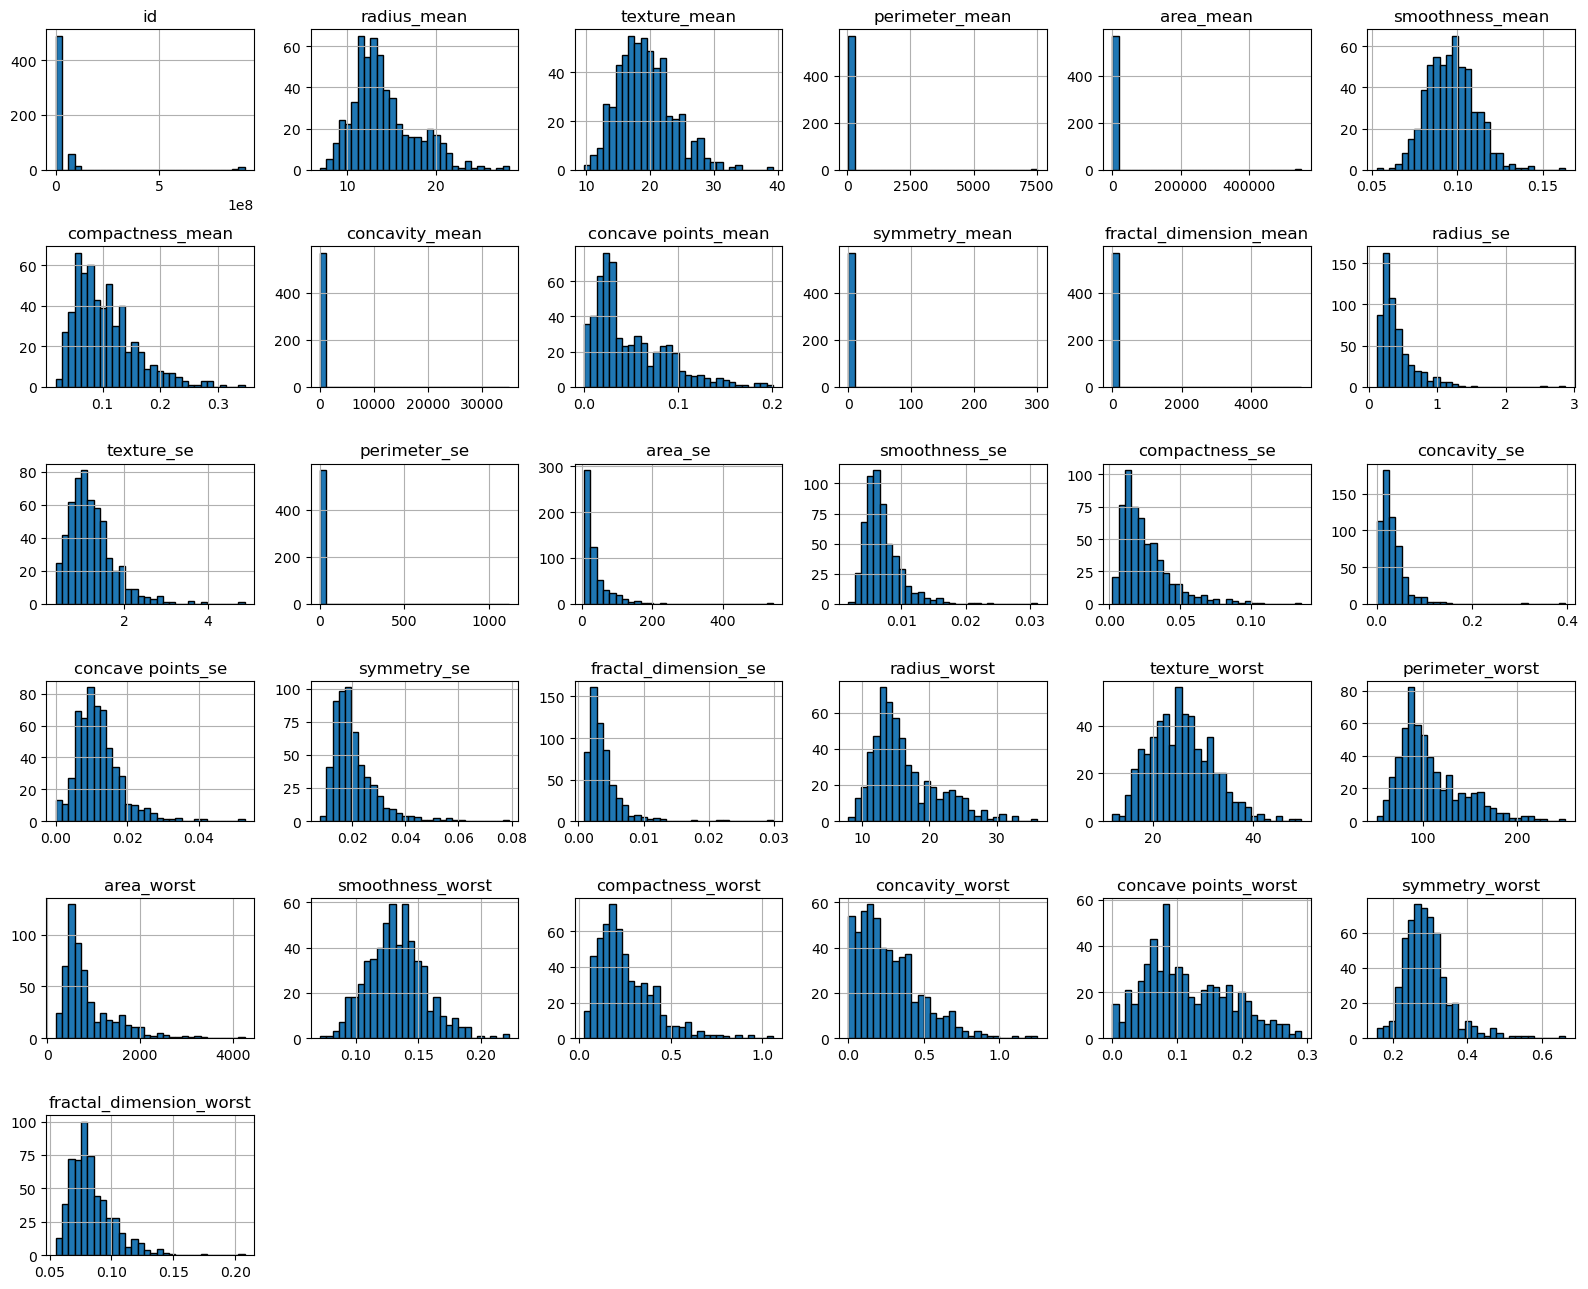

In [5]:
#histogram matrix to view all the data quickly and easily to evaluate how skewed the data is
df.hist(figsize=(16, 13), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [10]:
# Checking how skewed the data is as many of the histograms in the matrix look very skewed (1+ is usually considered very skewed)
skewed = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print (skewed)

fractal_dimension_mean     23.853721
concavity_mean             23.853721
symmetry_mean              23.853551
area_mean                  23.844156
perimeter_se               23.787300
perimeter_mean             23.637212
id                          6.473752
area_se                     5.474619
concavity_se                5.119626
fractal_dimension_se        3.933457
radius_se                   3.088612
smoothness_se               2.325203
symmetry_se                 2.205979
compactness_se              1.902830
area_worst                  1.860666
fractal_dimension_worst     1.662579
texture_se                  1.646444
compactness_worst           1.473555
concave points_se           1.456327
symmetry_worst              1.433928
compactness_mean            1.190467
concave points_mean         1.181420
concavity_worst             1.159579
perimeter_worst             1.130026
radius_worst                1.105070
radius_mean                 0.941615
texture_mean                0.650450
t

In [5]:
#Using log transformation on the skewed columns to normalize the data and help the models do a better job generalizing
skewed_cols = [
    'fractal_dimension_mean', 'concavity_mean', 'symmetry_mean', 'area_mean',
    'perimeter_se', 'perimeter_mean', 'area_se', 'concavity_se',
    'fractal_dimension_se', 'radius_se', 'smoothness_se', 'symmetry_se',
    'compactness_se', 'area_worst', 'fractal_dimension_worst', 'texture_se',
    'compactness_worst', 'concave points_se', 'symmetry_worst',
    'compactness_mean', 'concave points_mean', 'concavity_worst',
    'perimeter_worst', 'radius_worst'
]

In [6]:
df[skewed_cols] = df[skewed_cols].apply(np.log1p)

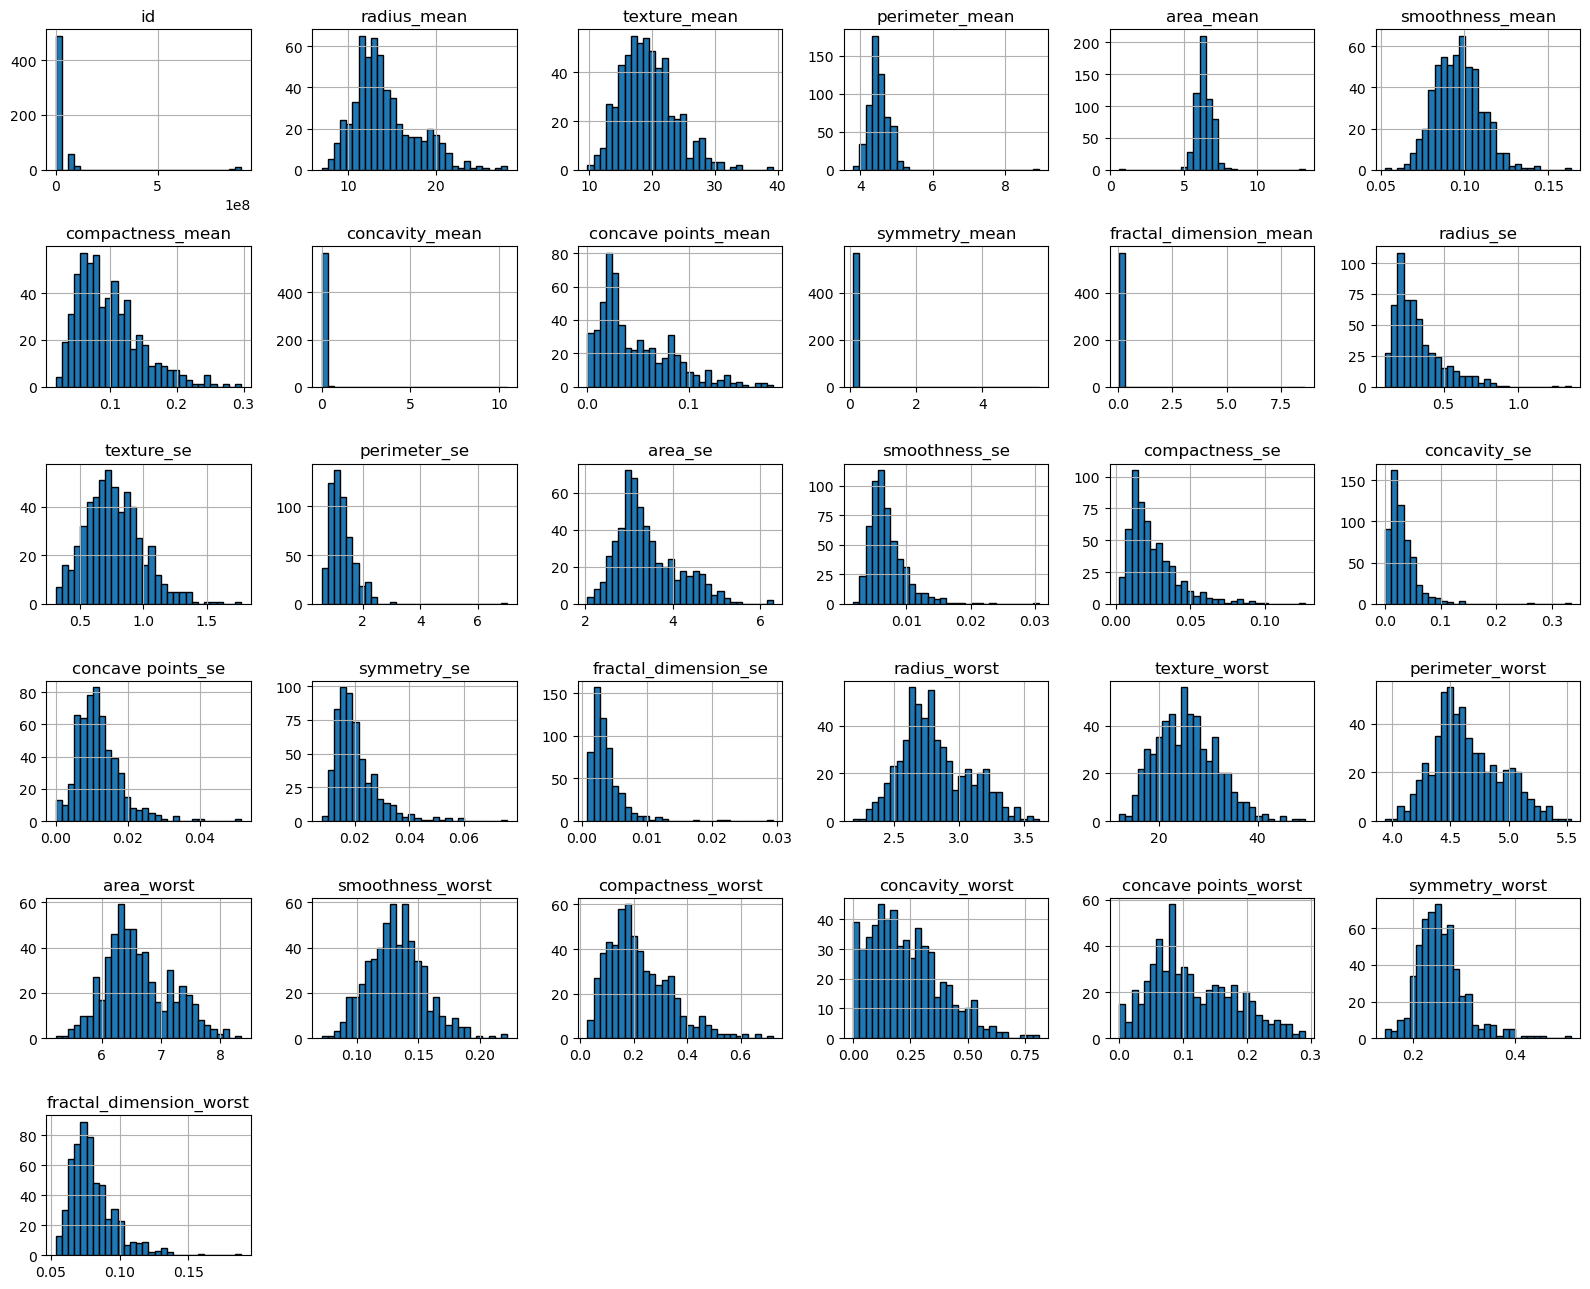

In [13]:
#checking the visual difference after taking log-- better 
df.hist(figsize=(16, 13), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [39]:
skewed2 = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print (skewed2)

fractal_dimension_mean     23.841563
symmetry_mean              23.507794
concavity_mean             22.957196
id                          6.473752
perimeter_mean              5.234197
concavity_se                4.240608
perimeter_se                3.983297
fractal_dimension_se        3.883852
smoothness_se               2.294087
symmetry_se                 2.146745
compactness_se              1.816906
radius_se                   1.713417
fractal_dimension_worst     1.558559
concave points_se           1.411388
symmetry_worst              1.152984
area_mean                   1.141782
concave points_mean         1.092908
compactness_worst           1.048729
compactness_mean            1.043575
radius_mean                 0.941615
area_se                     0.863930
concavity_worst             0.722995
texture_mean                0.650450
texture_se                  0.629526
radius_worst                0.508357
texture_worst               0.499858
concave points_worst        0.492616
p

## Examining Relationship Between Variables

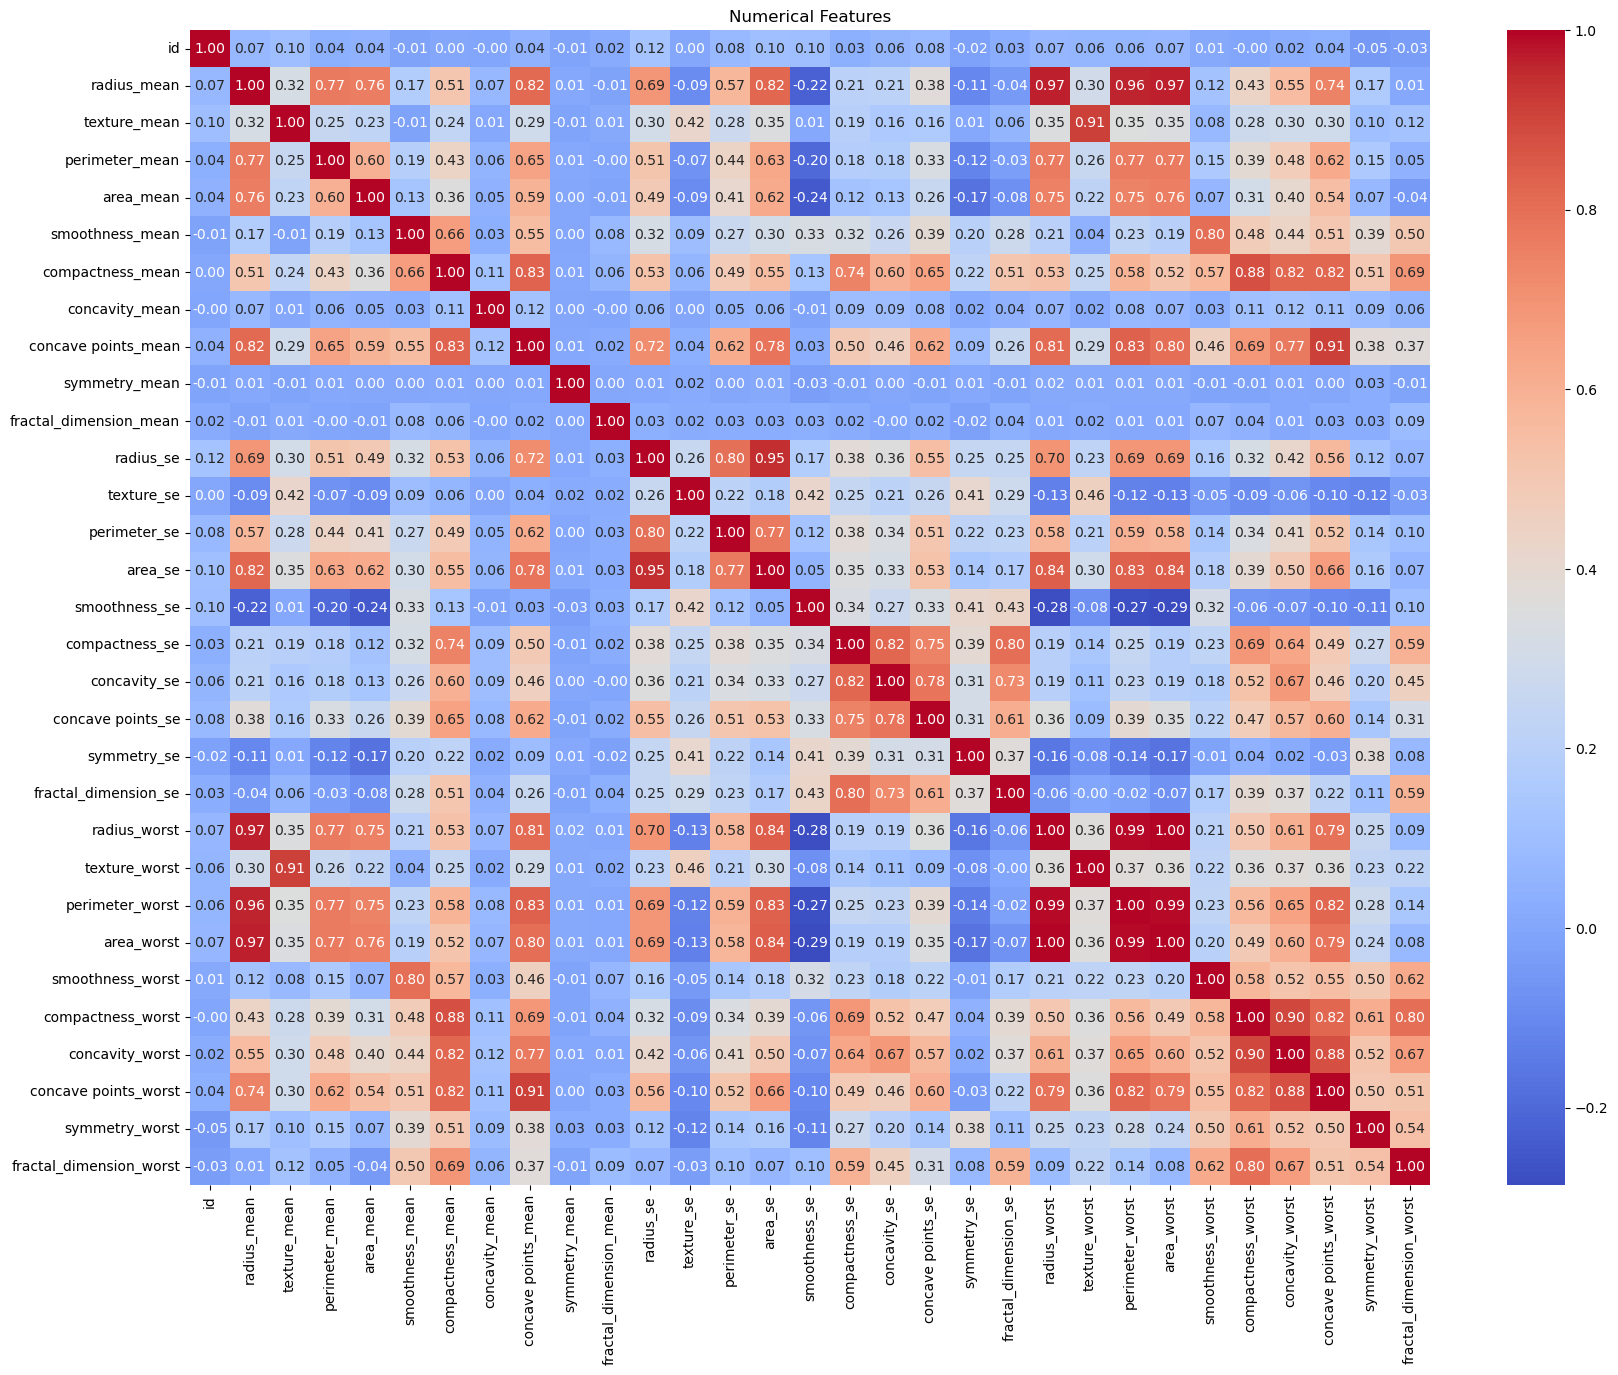

In [14]:
# creating a correlations matrix for numerical values 
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Features')
plt.show()

## Model Prep

In [47]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Logistic Regression tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 500]
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = grid_lr.predict(X_test)

best_mlp = grid_lr.best_estimator_
y_pred_lr = best_mlp.predict(X_test)
cross_val2 = grid_lr.best_score_
best_params = grid_lr.best_params_


print("Best params:", best_params)
print("Best cross-val score:", cross_val2)


In [ ]:
cm2 = confusion_matrix(y_test, y_pred_lr)

labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

counts = cm2.astype(str)
annot = np.char.add(labels, "\n")
annot = np.char.add(annot, counts)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=annot, fmt='', cmap='PuRd', cbar=False,
            xticklabels=['Pred: Benign (0)', 'Pred: Malignant (1)'],
            yticklabels=['Actual: Benign (0)', 'Actual: Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#💀

## SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

# SVM tuning
param_grid_svm = {'C': [0.1, 1, 10], 
                  'kernel': ['linear', 'rbf'],
                 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = grid_svm.predict(X_test)

best_mlp = grid_svm.best_estimator_
y_pred_svm = best_mlp.predict(X_test)
cross_val3 = grid_svm.best_score_
best_params = grid_svm.best_params_


print("Best params:", best_params)
print("Best cross-val score:", cross_val3)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_svm)

labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

counts = cm3.astype(str)
annot = np.char.add(labels, "\n")
annot = np.char.add(annot, counts)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=annot, fmt='', cmap='PuRd', cbar=False,
            xticklabels=['Pred: Benign (0)', 'Pred: Malignant (1)'],
            yticklabels=['Actual: Benign (0)', 'Actual: Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## NN

In [22]:
## Sample model as a base level for accuracy using NN's
clf = MLPClassifier(max_iter=1000,
                    alpha=0.001,
                    hidden_layer_sizes= (10,100,100),
                    activation = 'relu',
                   solver = 'adam')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_pred=pred, y_true = y_test)

acc
# acc = 0.9440559440559441

0.9440559440559441

In [31]:
## Looking deeper at best_params_ to increase accuracy
params1 = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=25), params1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=25),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50), (100, 50),
                                                (100, 100)],
                         'learning_rate_init': [0.001, 0.01]})

In [32]:
best_mlp = grid.best_estimator_
y_pred = best_mlp.predict(X_test)
cross_val = grid.best_score_

print("Best params:", best_params)
print("Best cross-val score:", cross_val)

#Best params: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001}
#Best cross-val score: 0.9671682626538989

Best params: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001}
Best cross-val score: 0.9671682626538989


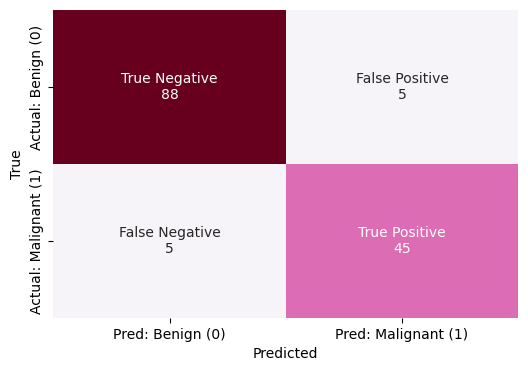

In [37]:
cm = confusion_matrix(y_test, y_pred)

labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

counts = cm.astype(str)
annot = np.char.add(labels, "\n")
annot = np.char.add(annot, counts)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=annot, fmt='', cmap='PuRd', cbar=False,
            xticklabels=['Pred: Benign (0)', 'Pred: Malignant (1)'],
            yticklabels=['Actual: Benign (0)', 'Actual: Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

param_grid_knn = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(clf, param_grid = param_grid_knn, cv = 100, scoring = "accuracy")

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_["n_neighbors"]

best_accuracy = grid_search.best_score_

best_k, best_accuracy

(3, 0.9640000000000001)

In [49]:
y_pred_knn = grid_search.predict(X_test)

best_mlp = grid_search.best_estimator_
y_pred_knn = best_mlp.predict(X_test)
cross_val3 = grid_search.best_score_

print("Best params:", best_k)
print("Best cross-val score:", cross_val)

Best params: 3
Best cross-val score: 0.9648812296227295


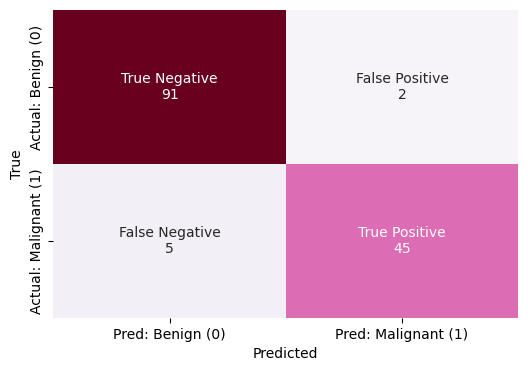

In [50]:
cm3 = confusion_matrix(y_test, y_pred_knn)

labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

counts = cm3.astype(str)
annot = np.char.add(labels, "\n")
annot = np.char.add(annot, counts)

plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=annot, fmt='', cmap='PuRd', cbar=False,
            xticklabels=['Pred: Benign (0)', 'Pred: Malignant (1)'],
            yticklabels=['Actual: Benign (0)', 'Actual: Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()